# **METAHEURISTICS FOR SOLVING BIN PACKING PROBLEM (3 Dimensions)**

**REFERENCES:**

BLUM, Christian; ROLI, Andrea. **Metaheuristics in Combinatorial Optimization: Overview and Conceptual Comparison**. ACM Computing Surveys, Vol. 35, No. 3. Set. 2003.

GARCÍA, josé; ALTIMIRAS, Franscisco; PEÑA, Alvaro; ASTORGA, Gino; PEREDO, Oscar. **A Binary Cuckoo Search Big Data Algorithm Applied to Large-Scale Crew Schedulling Problems**. Hindawi, 2018.

GHERBOUDJ, Amira; LAYEB, Abdesslem; CHIKHI, Salim. **Solving 0-1 Knapsack Problems by a Discrete Binary Version of Cuckoo Search Algorithm**. Bio-Inspired Computation, Vol. 4, No.4. Inderscience Enterprises Ltd, 2012.

NETO, Lúcio L. R.; BHAYA, Amit; KASZKUREWICS, Eugenius. **Um Algoritmo Genético Para o Problema de Carregamento de Container**. XXXVII Simpósio Brasileiro de Pesquisa Operacional. 2005. Gramado, RS.

PÉTROWSKI, Dréo; TAILLARD, Siriarry. **Metaheuristics for Hard Optimization: Methods and Case Studies**. Springer. 2006.

QUAARAB, Azis; AHIOD, Belaïd; Yang, Xin-She. **Discrete Cuckoo Search Algorithm for the Traveling Salesman Problem**. Neural Computing and Applications, vol. 24, no.7-8, pp.1659-1669. 2014.

SHEHAB, Mohammed; KHADER, Ahamad T.; AL-BETAR, Mohammed A. **A Survey on Applications and Variants of The Cuckoo Search Algorithm**. 2017.

ZENDAOUNI, Zakaria; LAYEB, Abdesslem. **Adaptive Cuckoo Search Algorithm for the Bin Packing Problem. Modeling and Implementation of Complex Systems, Lecture notes in Networks and Systems I**. Springer, 2016. Suíça.


### **SECTION I: BOX AND CONTAINERS CLASS**

In [ ]:
'''
------------------------------------------------------------------------------
Start to load container by the left lower quarter in the end of the container,
and then, stack the boxes in X direction. Then, when the Y axis loaded, start 
a new loading in the neighborhood from the boxes, going to Z direction. 

                         Y________________
                        /|               /|
                       / |              / |
                      /  |             /  |
                     /   |            /   | ->CONTAINER
                    /____|___________/    |
                    |    |__         |    |
                    |   /|_/| ->BOX  |    |
                    |   ||_||________|____| X->
                    |   |__|/        |   / 
                    |  /             |  /  
                    | /              | /
                    |/_______________|/
                    Z
------------------------------------------------------------------------------
'''


import numpy as np
import pandas as pd
import random
import itertools as itr
import time
import tracemalloc
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
sns.set(style="darkgrid")



class BOX: 
    #def __init__(self, height=None, lenght=None, width=None, volume=None, 
    #             weight=None, price=None, quantity=None): 
    def __init__(self, height=None, lenght=None, width=None, volume=None, 
                 weight=None, price=None):        
        self._height = height #altura
        self._lenght = lenght #comprimento
        self._width = width   #largura
        self._volume = volume
        self._weight = weight
        self._price = price
        #self._quantity = quantity;
        self._position = [0,0,0]
    
    def removeItem(self):
        if self._quantity > 0:
            self._quantity -= 1
            
    def removeItem(self, qtd=0):
        if qtd >= 0 and self._quantity > 0:
            self._quantity -= qtd
            
    def addItem(self):
        self._quantity += 1
        
    def addItem(self, qtd=0):
        if qtd >= 0:
            self._quantity += qtd
            
    def __eq__(self, other):
        expression = ((self.__class__ == other.__class__) and (self._height == other._height) and (self._lenght == other._lenght) and \
                       (self._width == other._width) and (self._weight == other._weight) and (self._price == other._price))

        return expression


class CONTAINER: 
    def __init__(self, height=None, lenght=None, width=None, MaxWeight=None, MaxPrice=None): 
        
        self._height = height
        self._lenght = lenght
        self._width = width
        self._MaxWeight = MaxWeight
        self._MaxPrice = MaxPrice
        self._MaxVolume = self._height * self._lenght * self._width
        
        
        self.clearContainer()

    def getTotalPriceContainer(self):
       
        totalPrice=0;
        for box in self._loadedBoxes[2:]:
            totalPrice += box[0]._price
        
        return totalPrice

    def getTotalWeightContainer(self):
       
        totalWeight=0;
        for box in self._loadedBoxes[2:]:
            totalWeight += box[0]._weight
        
        return totalWeight  
    
    def getTotalVolumeBoxesContainer(self):
       
        totalBoxesVolume=0;
        for box in self._loadedBoxes[2:]:
            totalBoxesVolume += box[0]._volume
        
        return totalBoxesVolume;  
        
    def rotate_box(self, option):
        switcher_list={0:[0,0,1], #Z axis rotation
                       1:[0,1,0], #Y axis rotation
                       2:[1,0,0], #X axis rotation
                       3:[0,1,1], #Y and Z axis rotation
                       4:[1,0,1], #X and Z axis rotation
                       5:[1,1,0]} #X and Y axis rotation
        
        return switcher_list.get(option, lambda :'Invalid')

    def findMaxHeight(self):
        i=0
        dist = 0
        max = 0
        for bx in self._loadedBoxes:
            if (dist + bx[1][0]) <= self._width:
                dist += bx[1][0]
                
                #i=0
                
                if max < bx[1][1]:
                    max = bx[1][1]
                i +=1
            else:
                break
        
        return max
      
    def neighborhood(self):
        pass
        
    def unloadBox(self):
        self._totalBoxes -= 1
        
    def clearContainer(self):
        #loading container info
        self._trackPos = [0,0,0] #Begin at the origin [0,0,0] cm
        self._trackBox = [0,0,0] #track by counting the the boxes packing in the three axis
       
        self._totalBoxes = 0
        
        
        self._loadedPrice = 0
        self._loadedVolume = 0
        self._loadedWeight = 0
        self._loadedBoxes = []
        
        self._remainingHeight = self._height
        self._remainingLenght = self._lenght
        self._remainingWidth = self._width
        self._remainingWeight = self._MaxWeight
        self._remainingPrice = self._MaxPrice
        self._remainingVolume = self._MaxVolume
        
        self.actual_max_box_height = 0
        self.actual_max_box_lenght = 0
        
        print("self._loadedBoxes.clear-> len(self._loadedBoxes) =", len( self._loadedBoxes) )
        #self._loadedBoxes = [];


    def loadBox(self, BOX):
           
        #if self.score();        
        if (BOX._width <= self._remainingWidth) :
             
    
            self._remainingWidth -= BOX._width
            
            self._loadedBoxes.append([BOX, self._trackPos])       
            
            print("loading BOX._price:", self._loadedBoxes[len(self._loadedBoxes) - 1][0]._price, "location: ", self._loadedBoxes[len(self._loadedBoxes) - 1][1] )
            
            self._trackPos[0] += BOX._width
            
            
            #Get the largest value of height from a "stacking" or "wall" 
            if self.actual_max_box_height < BOX._height:            
                self.actual_max_box_height = BOX._height
            #Get the largest value of lenght from a "stack"    
            if self.actual_max_box_lenght < BOX._lenght:
                self.actual_max_box_lenght = BOX._lenght 
                
            return False
        
        elif (BOX._height <= (self._remainingHeight - self.actual_max_box_height)): #altura
                  
                      
            self._remainingHeight -= self.actual_max_box_height
            self._remainingWidth = self._width - BOX._width
            
            self._trackPos[0] = 0
            self._trackPos[1] = self._height - self._remainingHeight
            
            self.actual_max_box_height = BOX._height      
           
            self._loadedBoxes.append([BOX, self._trackPos])       
            
            print("loading BOX._price:", self._loadedBoxes[len(self._loadedBoxes) -1][0]._price, "location: ", self._loadedBoxes[len(self._loadedBoxes) -1][1] )
            
            self._trackPos[0] += BOX._width
                       
            #Get the largest value of lenght from a "stack"
            if self.actual_max_box_lenght < BOX._lenght:
                self.actual_max_box_lenght = BOX._lenght 

            return False
        
        elif (BOX._lenght <= (self._remainingLenght - self.actual_max_box_lenght)):
        
            
            
            self._remainingLenght -= self.actual_max_box_lenght
            self._remainingHeight = self._height
            self._remainingWidth = self._width
           
            self._trackPos[0] = self._width - self._remainingWidth
            self._trackPos[1] = self._height - self._remainingHeight
            self._trackPos[2] = self._lenght - self._remainingLenght

            self._loadedBoxes.append([BOX, self._trackPos])
           
            print("loading BOX._price:", self._loadedBoxes[len(self._loadedBoxes) -1][0]._price, "location: ", self._loadedBoxes[len(self._loadedBoxes)-1][1] )
            
            self._trackPos[0] += BOX._width
            
            #Get the largest value of lenght from a "stack"
            self.actual_max_box_lenght = BOX._lenght          
            
            return False
        else:
            return True #Container is full!!
        
        
        return -1 #ERROR!




### **SECTION II: METAHEURISTICS CLASS**

In [ ]:
#from binpacking import BOX, CONTAINER

import numpy as np
import pandas as pd
import random
import itertools as itr
import time
import tracemalloc
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy import stats
from seaborn import boxplot
from matplotlib import pyplot
sns.set(color_codes=True)
sns.set(style="darkgrid")




class METAHEURISTIC_SOLUTION():
    def __init__(self, meta_Container=None, meta_BOX=None, coefficients=None, testConfig=None, name=None): 
        
        self.metaheuristicName = name
        self.testConfig = testConfig
        self._meta_container = meta_Container
        self._meta_boxes = meta_BOX
        self._boxesOrdered = []
        self._listOfAllBoxes = []
        
        self._mean = 0
        self._deviation = 0
        self._best_fit = 0
        
        self.coefficients = coefficients
   
    def fitness_volume(self, meta_cntnr):
        meta_cntnr._loadedVolume = meta_cntnr.getTotalVolumeBoxesContainer()
        fitValue = (meta_cntnr._loadedVolume / meta_cntnr._MaxWeight * 100)
        return fitValue
        
    def fitness_weight(self, meta_cntnr):
        meta_cntnr._loadedWeight = meta_cntnr.getTotalWeightContainer();
        fitValue = (meta_cntnr._loadedWeight / meta_cntnr._MaxVolume * 100)
        return  fitValue
    
    def fitness_gravity_center(self, meta_cntnr):
        #return ((self._height*1.5 - ((self._loadedWeight * ) /) / self._height) *100)
        
        return 0;
    
    def fitness_value(self, meta_cntnr):
        meta_cntnr._loadedPrice = meta_cntnr.getTotalPriceContainer();
        
        if (self._meta_container._loadedPrice > self._meta_container._MaxPrice):
            self._meta_container._loadedPrice = 0
            
        fitValue = (meta_cntnr._loadedPrice / meta_cntnr._MaxPrice * 100)
        return  fitValue



         
    def fitness_volume(self):
        self._meta_container._loadedVolume = self._meta_container.getTotalVolumeBoxesContainer()
        if (self._meta_container._loadedVolume > self._meta_container._MaxVolume):
            self._meta_container._loadedVolume = 0
            
        fitValue = (self._meta_container._loadedVolume / self._meta_container._MaxWeight * 100)
        return fitValue
        
    def fitness_weight(self):
        self._meta_container._loadedWeight = self._meta_container.getTotalWeightContainer();
    
        if (self._meta_container._loadedWeight > self._meta_container._MaxWeight):
            self._meta_container._loadedWeight = 0
        
        fitValue = (self._meta_container._loadedWeight / self._meta_container._MaxVolume * 100)
        return  fitValue
    
    def fitness_gravity_center(self):
        #return ((self._height*1.5 - ((self._loadedWeight * ) /) / self._height) *100)
        
        return 0;
    
    def fitness_value(self):
        self._meta_container._loadedPrice = self._meta_container.getTotalPriceContainer();
        fitValue = (self._meta_container._loadedPrice / self._meta_container._MaxPrice * 100)
        return  fitValue
        
        
    #Fitness function for this problem statement is to maximize TOTAL PRICE!
    #def fitness_function(self):
    def score(self):
        self._coef_volume = self.coefficients[0]
        self._coef_weight = self.coefficients[1]
        self._coef_gravity = self.coefficients[2]
        self._coef_value = self.coefficients[3]
    
        self._obj_value = (self._coef_volume * self.fitness_volume() + 
                          self._coef_weight * self.fitness_weight() + 
                          self._coef_gravity * self.fitness_gravity_center() + 
                          self._coef_value * self.fitness_value()) / (self._coef_volume + 
                          self._coef_weight + self._coef_gravity + self._coef_value)
        
        return self._obj_value  

    def plotHistogram(self, Final_solutions):
        i=0
        values=[]
        for i in range(len(Final_solutions)):
            values.append(Final_solutions[i][0][0])
                          
        fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
        sns.distplot(values, ax=ax1)
        plt.title('Distribuition of Obj Function for different Initializations')
        plt.ylabel('Probability density')
        plt.xlabel('Obj Function Values')
        plt.show()

        
    def statistics(self, Final_solutions, convergence, CPUstats): 
        self._mean = 0
        self._deviation = 0
        self._best_fit = 0
        
        #Find best solutions results
        rankedB = sorted(Final_solutions, key = lambda x: x[:][0][0], reverse=True)
        
        bestSolution = rankedB[0][0]
        indexbestSolution = rankedB[0][1]    
        
        rankedW = sorted(Final_solutions, key = lambda x: x[:][0][0], reverse=False)
        
        worstSolution = rankedW[0][0]
        indexWorstSolution = rankedW[0][1] 
        
        i=0
        values=[]
        for i in range(len(Final_solutions)):
            values.append(Final_solutions[i][0][0])
            
        mean = np.average(values)
        deviation = np.std(values)
        
        i=0
        memCPU=[]
        for MEM in CPUstats:
            memCPU.append(MEM[0])
        
        meanMEMCPU = np.average(memCPU)
        devMEMCPU = np.std(memCPU)
        
        #print("memCPU: ", memCPU)
        
        rank = sorted(memCPU, key = lambda x: x, reverse=True)
        #print("rankMEM: ", rank)
        bestMEMCPU = rank[0]
        worstMEMCPU = rank[len(rank) - 1]
        
        i=0
        timeCPU=[]
        for timeC in CPUstats:
            timeCPU.append(timeC[1])
        
        #print("timeCPU: ", timeCPU)

        meanTIMECPU = np.average(timeCPU)
        devTIMECPU = np.std(timeCPU)    

        rank = sorted(timeCPU, key = lambda x: x, reverse=True)
        #print("rankTIME: ", rank)
        bestTIMECPU = rank[0]
        worstTIMECPU = rank[len(rank) - 1]
        

        
        i=0
        total_price_loadded = 0 
        for box in bestSolution[2:]:
            total_price_loadded += box[0]._price

        i=0
        total_volume_loadded = 0 
        for box in bestSolution[2:]:
            total_volume_loadded += box[0]._volume
            
        i=0
        total_weight_loadded = 0 
        for box in bestSolution[2:]:
            total_weight_loadded += box[0]._weight
            
            
        i=0
        worst_total_price_loadded = 0 
        for box in worstSolution[2:]:
            worst_total_price_loadded += box[0]._price

        i=0
        worst_total_volume_loadded = 0 
        for box in worstSolution[2:]:
            worst_total_volume_loadded += box[0]._volume
            
        i=0
        worst_total_weight_loadded = 0 
        for box in worstSolution[2:]:
            worst_total_weight_loadded += box[0]._weight
            
            
        print("************ " + self.metaheuristicName + " STATISTICS ****************")
        print("-----TEST SETTINGS --------")

        
        for key, value in self.testConfig.items() :
            print (key, ':', value)
        
        #print("Max iterations: ", testConfigTS[0])
        #print("Max tabu size : ", testConfigTS[1])
        #print("Max Neighborhood: ", testConfigTS[2])
        #print("Max execution time (s): ", testConfigTS[3])
        print("---------------------------") 
        
        print("----- Overall Profile of Best Solutions --------")
        print("Obj Function Mean: ", mean)
        print("Obj Function Deviation: ", deviation)
        print("Max Memory Used: ", bestMEMCPU)
        print("Min Memory Used: ", worstMEMCPU)
        print("Mean Memory Used: ", meanMEMCPU)
        print("Standard Deviation of Memory Used: ", devMEMCPU)
        print("Max Time Used: ", bestTIMECPU)
        print("Min Time Used: ", worstTIMECPU)
        print("Mean Time Used: ", meanTIMECPU)
        print("Standard Deviation of Time Used: ", devTIMECPU)
        #print("Best Fit: ", self._best_fit)
        print("---------------------------") 
        print("----- Profile of Best Solution --------")
        print("Max execution time used (s): ", CPUstats[indexbestSolution][1])
        print("Memory used (MB): ", CPUstats[indexbestSolution][0])
        print("Value of Fitness Function: ", Final_solutions[indexbestSolution][0][0])
        print("Total boxes loadded: ", len(Final_solutions[indexbestSolution][0]) - 1)
        print("Total price loadded [R$]: ", total_price_loadded)
        print("Total volume loadded [cm³]: ", total_volume_loadded)
        print("Total weight loadded [Kg]: ", total_weight_loadded)
        #print("Value utilization (%): ", self._mean)
        #print("Volume utilization (%): ", self._mean)
        #print("Weight utilization (%): ", self._mean)
        print("****************************************")
        
        print("----- Profile of Worst Solution --------")
        print("Max execution time used (s): ", CPUstats[indexWorstSolution][1])
        print("Memory used (MB): ", CPUstats[indexWorstSolution][0])
        print("Value of Fitness Function: ", Final_solutions[indexWorstSolution][0][0])
        print("Total boxes loadded: ", len(Final_solutions[indexWorstSolution][0]) - 1)
        print("Total price loadded [R$]: ", worst_total_price_loadded)
        print("Total volume loadded [cm³]: ", worst_total_volume_loadded)
        print("Total weight loadded [Kg]: ", worst_total_weight_loadded)
        #print("Value utilization (%): ", self._mean)
        #print("Volume utilization (%): ", self._mean)
        #print("Weight utilization (%): ", self._mean)
        print("****************************************")
        
        
        plt.plot(convergence[indexbestSolution])
        plt.title('Convergence of Best Solution')
        plt.ylabel('Obj Function')
        plt.xlabel('Iteractions')
        plt.show()

        plt.plot(convergence[indexWorstSolution])
        plt.title('Convergence of Worst Solution')
        plt.ylabel('Obj Function')
        plt.xlabel('Iteractions')
        plt.show()
        
        self.plotHistogram(Final_solutions)
        
        
        #fig, (ax1) = plt.subplots(1, 2, figsize=(20, 6))
        #sns.distplot(memCPU, ax=ax1)
        sns.distplot(memCPU)
        plt.title('Distribuition of Memory Utilization for different Initializations')
        plt.ylabel('Probability density')
        plt.xlabel('Memory (MB)')
        plt.show()
        
        #fig, (ax2) = plt.subplots(1, 2, figsize=(20, 6))
        #sns.distplot(timeCPU, ax=ax2)
        sns.distplot(timeCPU)
        plt.title('Distribuition of Time (s) values for different Initializations')
        plt.ylabel('Probability density')
        plt.xlabel('Time (s)')
        plt.show()
        
        
    #get the input string name of parameters and transforms it to an acronym to abrevviate in graphs    
    def acronym(self, textUpperCase):
        glue = ' '
        words =  ''.join(glue + x if x.isupper() else x for x in textUpperCase).strip(glue).split(glue)
        acr = ""
        for upper in words:
            acr += upper[0]
            
        return acr        

    def statisticsParameterVariation(self, data):
        
        OF_values = []
        for i in range(len(data)):
            OF_values.append(data[i][0])
            
        MEM_values = []
        for i in range(len(data)):
            MEM_values.append(data[i][1][0])

        TIME_values = []
        for i in range(len(data)):
            TIME_values.append(data[i][1][1])
            
        
        parameters = []
        for i in range(len(data)):
            parameters.append(data[i][2])
        
        listVarParam = []
        for prm in parameters:
            strParam = ""
            if self.metaheuristicName == 'TABU SEARCH':
                
                if 'MaxSolutionsTS' in prm:
                    acr = self.acronym('MaxSolutionsTS')
                    strParam += acr + "=" + str(prm['MaxSolutionsTS']) + "\n"
                    
                if 'MaxNeighborhoodTS' in prm:
                    acr = self.acronym('MaxNeighborhoodTS')
                    strParam += acr + "=" +  str(prm['MaxNeighborhoodTS']) + "\n"
                    
            
            if self.metaheuristicName == 'ADAPTIVE CUCKOO SEARCH':
                if 'populationSizeACS' in prm:
                    acr = self.acronym('populationSizeACS')
                    strParam += acr + "=" +  str(prm['populationSizeACS']) + "\n"        
    
                if 'p_a_ACS' in prm:
                    acr = self.acronym('p_a_ACS')
                    strParam += acr + "=" +  str(prm['p_a_ACS']) + "\n"
                    
                if 'lambdaACS' in prm:
                    acr = self.acronym('lambdaACS')
                    strParam += acr + "=" +  str(prm['lambdaACS']) + "\n"
                
            listVarParam.append(strParam)
            
       
        if self.metaheuristicName == 'TABU SEARCH':   
            print("*********** LIST OF ABREVIATIONS ***********")
            print(self.acronym('MaxSolutionsTS') + " = MaxSolutionsTS")
            print(self.acronym('MaxNeighborhoodTS') + " = MaxNeighborhoodTS")
            print("********************************************")
        
        if self.metaheuristicName == 'ADAPTIVE CUCKOO SEARCH':
            print("*********** LIST OF ABREVIATIONS ***********")
            print(self.acronym('populationSizeACS') + " = populationSizeACS")
            print(self.acronym('p_a_ACS') + " = p_a_ACS")
            print(self.acronym('lambdaACS') + " = lambdaACS")
            print("********************************************")       
            
        #PLOT THE OBJECTIVE FUNCTION VALUES FOR DIFFERENT PARAMETER VARIATION 
        #data = {'C=10\nP=12\npa=0.25':20, 'C++':15, 'Java':30,  
        #        'Python':35}  
        
        #parameters = list(data.keys()) 
        #values = list(data.values()) 
           
        fig = plt.figure(figsize = (15, 8)) 
          
        ''' PLOT OBJECTIVE FUNCTION '''
        barplot = plt.bar(listVarParam, OF_values, color ='blue',  
                width = 0.4) 
        #red_patch = mpatches.Patch(color='red', label='Neighborhood')
        #blue_patch = mpatches.Patch(color='blue', label='The blue data')
        #plt.legend(handles=[red_patch, blue_patch])        
        plt.xlabel("Parameters Variation") 
        plt.ylabel("Objective Function Values") 
        plt.title("O.F. For Different Parameter Combinations in "+ self.metaheuristicName + " For Best Initial Solution") 
        # Turn grid on for both major and minor ticks and style minor slightly
        # differently.
        plt.grid(which='major', color='#CCCCCC', linestyle='--')
        plt.grid(which='minor', color='#CCCCCC', linestyle=':')
        fig.tight_layout() 
        
        
        for bar in barplot:
            yval = bar.get_height()*1.0
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, '%.2f' % float(yval), va='bottom') #va: vertical alignment y positional argument
         
        plt.show() 
        
        ''' PLOT MEMORY UTILIZATION '''
        fig = plt.figure(figsize = (15, 8)) 
        barplot = plt.bar(listVarParam, MEM_values, color ='red',  
                width = 0.4) 
        #red_patch = mpatches.Patch(color='red', label='Neighborhood')
        #blue_patch = mpatches.Patch(color='blue', label='The blue data')
        #plt.legend(handles=[red_patch, blue_patch])        
        plt.xlabel("Parameters Variation") 
        plt.ylabel("Memory (MB) Values") 
        plt.title("Memory Utilization For Different Parameter Combinations in "+ self.metaheuristicName + " For Best Initial Solution") 
        plt.grid(which='major', color='#CCCCCC', linestyle='--')
        plt.grid(which='minor', color='#CCCCCC', linestyle=':')
        fig.tight_layout()
        
        for bar in barplot:
            yval = bar.get_height()*1.0
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, '%.2f' % float(yval), va='bottom') #va: vertical alignment y positional argument
 
        plt.show() 
        
        
        ''' PLOT TIME UTILIZATION '''
        fig = plt.figure(figsize = (15, 8)) 
        barplot = plt.bar(listVarParam, TIME_values, color ='green',  
                width = 0.4) 
        #red_patch = mpatches.Patch(color='red', label='Neighborhood')
        #blue_patch = mpatches.Patch(color='blue', label='The blue data')
        #plt.legend(handles=[red_patch, blue_patch])        
        plt.xlabel("Parameters Variation") 
        plt.ylabel("Time (s) Values") 
        plt.title("Time Utilization For Different Parameter Combinations in "+ self.metaheuristicName + " For Best Initial Solution") 
        plt.grid(which='major', color='#CCCCCC', linestyle='--')
        plt.grid(which='minor', color='#CCCCCC', linestyle=':')
        fig.tight_layout()
        
        for bar in barplot:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0,  yval,'%.2f' % float(yval), va='bottom') #va: vertical alignment y positional argument
 
        plt.show() 
        
        
        
        
        

        
        
        
        
    def createListFromAllBoxes(self):
        i=0
        for box in self._meta_boxes:
            quantity = box[1]
            while quantity > 0:
                self._listOfAllBoxes.append(box[0])
                quantity -= 1
                
       # print("_listOfAllBoxes[0].price: ", self._listOfAllBoxes[0]._price)  
        return 1
    
    
    def printProperties(self):
        print("fitness_volume(): ", self.fitness_volume())
        
        print("fitness_weight(): ", self.fitness_weight())
        
        print("fitness_value(): ", self.fitness_value())       
        
        print("fitness_gravity_center(): ", self.fitness_gravity_center())  
        
        #return FirstSolution
        
        print("self._meta_boxes[1]._quantity= ", self._meta_boxes[1][1])
    
    def printStatistics(self):
        pass
    
    def shuffleList(self, list_boxes, number_of_changes):
       
        i=0
        while i < number_of_changes:
            index_box_a = random.randint(0,len(list_boxes)-1) 
            index_box_b = random.randint(0,len(list_boxes)-1)
            
            print("list_boxes[index_box_a] = ", list_boxes[index_box_a], "list_boxes[index_box_b]", list_boxes[index_box_b])
            
            aux_box = list_boxes[index_box_b]
            list_boxes[index_box_b] = list_boxes[index_box_a]
            list_boxes[index_box_a] = aux_box
            i += 1
    
        return list_boxes     
    
    def clearContainer(self):
        self._meta_container.clearContainer()
        
        return True
    
    def createContainerSolution(self, list_boxes):
         
        i=0;
        #for box in self._boxesOrdered:
        for box in list_boxes:  
                
            returnedValue = self._meta_container.loadBox(box)
            
            if returnedValue == False:
                pass;
                
            elif returnedValue == True:
                
                #print("CONTAINER IS FULL!")                
                
                score = self.score();
                
                self._meta_container._loadedBoxes.insert(0, score)
                
                break
                
            else:
                print("ERROR IN LOADING CONTAINER!!!")
            

        print("price of least box: ", self._meta_container._loadedBoxes[len(self._meta_container._loadedBoxes) - 1][0]._price)
        
        print("Total price loaded in container: ", self._meta_container.getTotalPriceContainer(), "Max Price of Container: ",  self._meta_container._MaxPrice)

        print("Total weight loaded in container: ", self._meta_container.getTotalWeightContainer(), "Max Weight of container: ", self._meta_container._MaxWeight)

        print("Total volume of boxes loaded in container: ;", self._meta_container.getTotalVolumeBoxesContainer(),"Max Volume of the container: ", self._meta_container._MaxVolume)
                
        print("Number of boxes packed: ", len(self._meta_container._loadedBoxes) - 1)
        
        return self._meta_container._loadedBoxes
    
        
    def compareLoaddedBoxes(self, list1, list2):
       
        if len(list1) == len(list2):
            i=0
            for i in range(len(list2)):   
                if list1[i] != list2[i]:
                    return False #Lists are not identical!
        else:
            return False
        
        return True      
           
    
    
    
    
#-------------- Metaheuristics --------------  
    
    
class TABU_SEARCH(METAHEURISTIC_SOLUTION):
    def __init__(self, meta_BOX=None, meta_Container=None,  coefficients=None, testConfig=None):
        super().__init__(meta_Container, meta_BOX, coefficients, testConfig, name="TABU SEARCH")
  
  
        self.TABU_LIST = []
        self.MaxSolutions =  testConfig['MaxSolutionsTS']
        self.MaxNeighborhood = testConfig['MaxNeighborhoodTS']
        self.MaxRunTime = testConfig['MaxRunTimeTS']
        self.MaxIterations = testConfig['MaxIterationsTS']
        
    def addInTabuList(self, list_boxes):  
       # print("tabu list")
       # print("self.MaxSolutions= ", self.MaxSolutions)
       # print("len(self.TABU_LIST)= ", len(self.TABU_LIST))
        if len(self.TABU_LIST) > 0:    
            for listOfLoaddedBoxes in self.TABU_LIST:                           
                if self.compareLoaddedBoxes(list_boxes[1:], listOfLoaddedBoxes[1:]) == True: #Compare if two lists are identical
                    #print("There is another equal solution already added in tabu list!")
                    return False #There is another equal solution in tabu list and it will not be replicated!
                
            if (len(self.TABU_LIST) < self.MaxSolutions):   
                #print("added in tabu list of lenght: ", len(self.TABU_LIST))                    
                self.TABU_LIST.append(list_boxes) 
                return True
                
            else:
                #print("first item removed and added in tabu list of lenght: ", len(self.TABU_LIST))
                self.TABU_LIST.pop(0) #delete first solution item loadded in tabu list and add a new one
                self.TABU_LIST.append(list_boxes) 
                return True
                                      
        self.TABU_LIST.append(list_boxes)
        #print("First tabu list added!")
        return True 




    ''' Fucntion to generate neighborhood solutions from a seed list '''
    def generateNeighborhood(self, SeedList):
        step = 5
        times = 10
        
        tempList = []
        tempList = SeedList
        neighborhoodLists = []
        neighborhoodLists.append(tempList)
        
        j=0
        k=j+step
        l=k+3*step
        m=l+step
        
        for i in range(self.MaxNeighborhood -1):
            
            for n in range(times):
                if m < len(SeedList):
                    swap_a = tempList[j]
                    tempList[j] = tempList[k]
                    tempList[k] = swap_a  
                    
                    swap_a = tempList[l]
                    tempList[m] = tempList[l]
                    tempList[l] = swap_a   
                    
                    j += 1
                    k=j+step
                    l=k+10*step
                    m=l+step
                    
                else:
                    break

            neighborhoodLists.append(tempList)
                            
        return neighborhoodLists
    
    
    def rankSolutions(self, Solutions):
        #bestSolution = []
        #bestSolution.append(Solutions[0])
        rankedSol = sorted(Solutions, key = lambda x: x[0][0], reverse=True);
       
        return rankedSol
    
    def rankFinalSolutions(self, Solutions):
        #bestSolution = []
        #bestSolution.append(Solutions[0])
        rankedSol = sorted(Solutions, key = lambda x: x[0], reverse=True);
       
        return rankedSol       
    
    def diversifySearch(self):
        pass    


    def getSolutions(self, InitialSolution):
        start=time.time()   #init timer
        tracemalloc.start() #Check memory usage
        
        print("\n---------------------TABU SEARCH-------------------------------------\n")
    
        self.createListFromAllBoxes()
            
        FinalSolution = []
        loaddedSolutions = []
        rankedSolutions = []
        convergence = []
        
        #Start loading sequence by max box values
        #OneListSolution = sorted(self._listOfAllBoxes, key = lambda x: x._price, reverse=True)
        OneListSolution = InitialSolution
        
        oneLoaddedSolution = self.createContainerSolution(OneListSolution)
        self.addInTabuList(oneLoaddedSolution)
        
        convergence.append(oneLoaddedSolution[0])
    
        #return oneLoaddedSolution
    
        iterations = 1;
        while iterations <= self.MaxIterations and time.time() <= (start + self.MaxRunTime):
            
            ''' GENERATE NEIGHBORHOOD FROM FIRST SOLUTION (INTENSIFICATION SEARCH) '''
            NeighborhoodLists = self.generateNeighborhood(OneListSolution)
            
            indexNeighborhood=0
            for oneLoad in NeighborhoodLists:  
                self.clearContainer()
                oneSolution = self.createContainerSolution(oneLoad);
                loaddedSolutions.append([oneSolution, indexNeighborhood])
                indexNeighborhood +=1
                        
            rankedSolutions = self.rankSolutions(loaddedSolutions)
            
            
            ''' ADD BEST SOLUTION TO TABU LIST '''
            i=0
            #SEARCH FOR THE NEXT BEST RANKED SOLUTION THAT ISN'T ALREADY IN TABU LIST                
            while (self.addInTabuList(rankedSolutions[i][0]) == False):
                if (i + 1) < len(rankedSolutions):
                    i += 1
                    #Update index from current best solution
                    indexNeighborhood = rankedSolutions[i][1]
                    
                else:
                    break
            
            ''' BEST NEIGHBORHOOD SOLUTION IS THE NEW SEED IN SEARCH SPACE '''
            #print("\n\n indexNeighborhood: \n\n", indexNeighborhood)
            OneListSolution = NeighborhoodLists[indexNeighborhood - 1]
            
            convergence.append(rankedSolutions[0][0][0]) #get the objective function value through iteractions
            
            ''' START DIVERSIFICATION SEARCH '''
            random.shuffle(OneListSolution) 
            #OneListSolution = diversifySearch(OneListSolution)
      
            
            iterations += 1
            
        ranked = []
        ranked = self.rankFinalSolutions(self.TABU_LIST)
        
        convergence.append(ranked[0][0])
        
        FinalSolution = ranked[0]
        
        #self.printProperties(FinalSolution)
        
        #self.printStatistics()
       
        
        current, peak = tracemalloc.get_traced_memory()
        print(f"TABU SEARCH: Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
        tracemalloc.stop() #stop memory usage tracking
        
        tm = (time.time() - start) 
        print("TABU SEARCH: Current time comsumption was: {%H}", tm)
        
        print("\n\n----------------------------------------------------------------------\n\n")
        
        
        CPUutilization=[]
        CPUutilization.append(current/10**6)
        CPUutilization.append(tm)
        #return self.TABU_LIST
        return FinalSolution, convergence, CPUutilization
    
    
    
    



   

class ADAPTIVE_CUCKOO_SEARCH(METAHEURISTIC_SOLUTION):
    def __init__(self, meta_BOX=None, meta_Container=None,  coefficients=None, testConfig=None):
        super().__init__(meta_Container, meta_BOX, coefficients, testConfig, name="ADAPTIVE CUCKOO SEARCH")

        self.MaxPopulation = testConfig['populationSizeACS']
        self.MaxRunTime = testConfig['MaxRunTimeACS']
        self.MaxIterations = testConfig['MaxIterationsACS']
        self.p_a = testConfig['p_a_ACS']
        self.lambdaACS = testConfig['lambdaACS']
        self.stepSize = 5
        self.dimension = 1
    
    def levy_flight(self):
        #generate step from levy distribution
        sigma1 = np.power((math.gamma(1 + self.lambdaACS) * np.sin((np.pi * self.lambdaACS) / 2)) \
                          / math.gamma((1 + self.lambdaACS) / 2) * np.power(2, (self.lambdaACS - 1) / 2), 1 / self.lambdaACS)
        sigma2 = 1
        u = np.random.normal(0, sigma1, size=self.dimension)
        v = np.random.normal(0, sigma2, size=self.dimension)
        step = u / np.power(np.fabs(v), 1 / self.lambdaACS)
    
        return step    

  
    def localRandomMove(self, oneListSolution):
        
        #use levy_flight() function to move!
        tempSol = []
        i=0
        for cuckoo in oneListSolution:
            tempSol.append([cuckoo, i + self.stepSize*self.levy_flight()])
            i +=1
        
        #RANKED ORDER VALUE (ROV)
        tempSol = sorted(tempSol, key = lambda x: x[:][1], reverse=False);
        
        newSol = []        
        for item in tempSol:
            newSol.append(item[0])

        return newSol
    


    def getSolutions(self, initialSolution):
        
        start=time.time()   #init timer
        tracemalloc.start() #Check memory usage 
        CPUutilization=[]
        print("\n----------------------CUCKOO SEARCH------------------------------------\n")
     
        self.createListFromAllBoxes()
        
        self.clearContainer()
           
        Nests = []
        FinalSolution = []
        #OneListSolution = sorted(self._listOfAllBoxes, key = lambda x: x._price, reverse=True)   
        
        OneListSolution = initialSolution

        ''' Create Initial Solutions (Nests) '''
        Nests.append(OneListSolution)
        #create random initial list of all possible solutions
        for i in range(1, self.MaxPopulation):
            random.shuffle(OneListSolution)
            Nests.append(OneListSolution)
 
        #load nest to container that will fit to size and other constrains
        loadded_container_nest = []
        for i in range(len(Nests)):
            self.clearContainer()
            loadded_container_nest.append([self.createContainerSolution(Nests[i]), i])

        ''' Sort List '''        
        loadded_container_nest = sorted(loadded_container_nest, key = lambda x: x[:][0], reverse=False)

        ''' Find Initial Best'''
        bestSolutionNest = loadded_container_nest[0][0]
        bestPosition = Nests[loadded_container_nest[0][1]] #Actualy stores the sequence list that generate the actual loading container that maximizes objective function!

        convergence = []
        
        convergence.append(bestSolutionNest[0])
        
        newNest = []
        solutionNests = []

        iterations = 0;
        while iterations <= self.MaxIterations and time.time() <= (start + self.MaxRunTime):
            
            ''' Generate New Solutions '''
            for i in range(len(Nests)):
                
                ''' Get Cuckoo: set new position by levy_flight() function and evaluate obj function'''
                tempNest = self.localRandomMove(Nests[i])
                self.clearContainer()
                newNest = self.createContainerSolution(tempNest)
                
                #random choice
                j = np.random.randint(0, len(Nests))
                while j == i:
                    j = np.random.randint(0, len(Nests))
                
                self.clearContainer()
                otherNest = self.createContainerSolution(Nests[j])

                ''' Random position Choice and compare with current obj function '''
                if(newNest[0] > otherNest[0]):    
                    Nests[j] = tempNest

            loadded_container_nest = []
            for i in range(len(Nests)):
                self.clearContainer()
                loadded_container_nest.append([self.createContainerSolution(Nests[i]), i])

            ''' Sort solutions according to objective function '''
            loadded_container_nest = sorted(loadded_container_nest, key = lambda x: x[:][0], reverse=False)      
            
            ''' Based on probability, abandon nests (create new positions), except the best current solution '''
            for i in range(1, len(loadded_container_nest)):
                if i != loadded_container_nest[0][1]:
                    rdn = np.random.rand()
                    if(rdn < self.p_a):
                        random.shuffle(Nests[i]) #abandon nest, or, in other words, create a new solution
                        self.clearContainer()
                        loadded_container_nest[i][0] = self.createContainerSolution(Nests[i])
                        loadded_container_nest[i][1] = i
                      
            
            ''' Sort solutions according to objective function '''
            loadded_container_nest = sorted(loadded_container_nest, key = lambda x: x[:][0], reverse=False)             
            
          
            ''' Get best current fitnes and position from current cuckoo solutions for next iteration comparisons '''
            if bestSolutionNest[0] < loadded_container_nest[0][0][0]:
                bestSolutionNest = loadded_container_nest[0][0]
                bestPosition = Nests[loadded_container_nest[0][1]] #Actually stores the sequence list that generate the actual loading container that maximizes objective function!
            
            convergence.append(bestSolutionNest[0])
            
            iterations += 1;
    

    
        current, peak = tracemalloc.get_traced_memory();
        print(f"CUCO SEARCH: Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
        tracemalloc.stop() #stop memory usage tracking
        
        tm = (time.time() - start) 
        print("CUCKOO SEARCH: Current time comsumption was: {%H}", tm)
        print("\n\n-----------------------------------------------------------------------\n\n")
        
        
        CPUutilization=[]
        CPUutilization.append(current/10**6)
        CPUutilization.append(tm)
        
        return bestSolutionNest, convergence, CPUutilization
    
    
    


### **SECTION III: RUN BACTH TEST!!**

In [ ]:
#from binpacking import BOX, CONTAINER
#from metaheuristicsClass import TABU_SEARCH, ADAPTIVE_CUCKOO_SEARCH
import random
import datetime
import time
import tracemalloc

startTime=time.time()   #init timer
#tracemalloc.start() #Check memory usage 
#CPUutilization=[]

#Objective Function Coefficients for Price Maximization (0.0 to 1.0):
k1 = 0.4; #Volume maximization coefficient 
k2 = 0.2; #Weight maximization coefficient 
k3 = 0.0; #Gravity center maximization coefficient (NOT IMPLEMENTED!!)
k4 = 0.95; #Price maximization coefficient 

coefficients = [k1, k2, k3, k4]

#height, lenght, width [cm], MaxWeight [Kg], MaxPrice [R$]
LOADDED_CONTAINER = CONTAINER(135.0, 500.0, 108.0, 18070.0, 300000.0)

#height,lenght,width [cm], Volume [cm³], Weight [Kg], Price [R$], quantity 
BOXES = []
BOXES.append([BOX(47.7, 46.0, 36.0, 78991.2, 14.1, 1253.0), 20])
BOXES.append([BOX(41.9, 56.3, 35.8, 84451.1, 9.6,  626.0), 25])
BOXES.append([BOX(41.9, 56.3, 35.8, 84451.1, 10.0, 704.0), 20])
BOXES.append([BOX(41.9, 56.3, 35.8, 84451.1, 10.6, 791.0), 15])
BOXES.append([BOX(41.9, 56.3, 35.8, 84451.1, 10.6, 1018.0), 10])
BOXES.append([BOX(45.6, 47.3, 38.2, 82392.8, 13.7, 1488.0), 5])
BOXES.append([BOX(44.5, 44.1, 33.5, 65742.1, 10.7, 1096.0), 5])




''' ****************** TABU SEARCH ****************** '''

numberOfInitialSolutionsTS = 10
CPU_utilizationTS = []
#Simulation Parameters
MaxIterationsTS = 100
MaxSolutionsTS = 30 #size of tabu list
MaxNeighborhoodTS = 10 #size of neighborhood for intensification search
MaxRunTimeTS = 300 #Set max runtime of 5 min
#MaxMemoryUsage = 100 #100MB

parametersTS = {'MaxIterationsTS':MaxIterationsTS, 'MaxSolutionsTS':MaxSolutionsTS, 
                'MaxNeighborhoodTS':MaxNeighborhoodTS, 'MaxRunTimeTS':MaxRunTimeTS}

TABU = TABU_SEARCH(BOXES, LOADDED_CONTAINER, coefficients, parametersTS)

InitialSolution = TABU.createListFromAllBoxes()

finalTS= []
CPU_utilizationTS = []
convergenceTS = []
#Start loading sequence by max box values
InitialSolution = sorted(TABU._listOfAllBoxes, key = lambda x: x._price, reverse=True)

InitialSolutionWithOF = [] #track initial solution and objective function to further analysis

for i in range(numberOfInitialSolutionsTS):
    
    Final_solution_tabu_search, convTS, CPU_TS = TABU.getSolutions(InitialSolution)
    
    finalTS.append([Final_solution_tabu_search, i])
    CPU_utilizationTS.append(CPU_TS)
    convergenceTS.append(convTS) 
    
    InitialSolutionWithOF.append([InitialSolution, Final_solution_tabu_search[0]])
    
    random.shuffle(InitialSolution)

#Get the best initial solution
OF = []
for i in range(len(InitialSolutionWithOF)):
    OF.append(InitialSolutionWithOF[i][1])

print("OF[0]", OF[0])

indexBestInitialSolution = OF.index(max(OF))


BestInitialSolution = InitialSolutionWithOF[indexBestInitialSolution][0]


''' CREATE PARAMETERS VARIATION FOR TABU SEARCH '''
#Set parameters to variate
#ListMaxSolutionsTS = [10, 20, 40, 60]
#ListMaxNeighborhoodTS = [5, 15, 30]
ListMaxSolutionsTS = [10, 25, 35]
ListMaxNeighborhoodTS = [5, 15, 30]

BestParametersTS = []

for TABU_SIZE in ListMaxSolutionsTS:
    for Neighbor in ListMaxNeighborhoodTS:
        
        MaxSolutionsTS = TABU_SIZE
        MaxNeighborhoodTS = Neighbor
        
        parametersTS = {'MaxIterationsTS':MaxIterationsTS, 'MaxSolutionsTS':MaxSolutionsTS, 
                'MaxNeighborhoodTS':MaxNeighborhoodTS, 'MaxRunTimeTS':MaxRunTimeTS}
        
        BEST_TABU = TABU_SEARCH(BOXES, LOADDED_CONTAINER, coefficients, parametersTS)

        #InitialSolution = TABU.createListFromAllBoxes()
        
        Best_tabu_search, BestconvTS, BestCPU_TS = TABU.getSolutions(BestInitialSolution)
        
        BestParametersTS.append([Best_tabu_search[0], BestCPU_TS, parametersTS])
        


    
 
    

    
    

''' ****************** ADAPTIVE CUCKOO SEARCH ****************** '''
numberOfInitialSolutionsACS = 10
CPU_utilizationACS = []

MaxRunTimeACS = 300
MaxIterationsACS = 100
populationSizeACS = 10
p_a_ACS = 0.25 #Portion of bad solutions
lambdaACS = 1.5 #levy flights parameter


parametersACS = {'MaxIterationsACS':MaxIterationsACS, 'MaxRunTimeACS':MaxRunTimeACS, 
                 'populationSizeACS':populationSizeACS, 'p_a_ACS': p_a_ACS, 
                  'lambdaACS':lambdaACS}


ACS = ADAPTIVE_CUCKOO_SEARCH(BOXES, LOADDED_CONTAINER, coefficients, parametersACS)

InitialSolutionACS = ACS.createListFromAllBoxes()
#Start loading sequence by max box values
InitialSolutionACS = sorted(ACS._listOfAllBoxes, key = lambda x: x._price, reverse=True)

finalACS= []
CPU_utilizationACS = []
convergenceACS = []

ACSInitialSolutionWithOF = []


for i in range(numberOfInitialSolutionsACS):
    Final_solution_adaptive_cuckoo_search, convACS, CPU_ACS = ACS.getSolutions(InitialSolutionACS)
    finalACS.append([Final_solution_adaptive_cuckoo_search, i])
    CPU_utilizationACS.append(CPU_ACS)
    convergenceACS.append(convACS)  
    
    ACSInitialSolutionWithOF.append([InitialSolutionACS, Final_solution_adaptive_cuckoo_search[0]])
    
    random.shuffle(InitialSolutionACS)




#Get the best initial solution
ACSOF = []
for i in range(len(ACSInitialSolutionWithOF)):
    ACSOF.append(ACSInitialSolutionWithOF[i][1])

print("ACSOF[0]", ACSOF[0])

indexBestInitialSolution = ACSOF.index(max(ACSOF))


BestInitialSolutionACS = ACSInitialSolutionWithOF[indexBestInitialSolution][0]



''' CREATE PARAMETER VARIATION FOR ADAPTIVE CUCKOO SEARCH '''
ListP_a_ACS = [0.1, 0.2, 0.3]
ListLambdaACS = [1.5, 3.0]
ListPopulationSizeACS = [10, 20]


BestParametersACS = []


for P_a in ListP_a_ACS:
    for Lambda in ListLambdaACS:
        for pop in ListPopulationSizeACS:
        
            lambdaACS = Lambda
            p_a_ACS = P_a
            populationSizeACS = pop
            
            parametersACS = {'MaxIterationsACS':MaxIterationsACS, 'MaxRunTimeACS':MaxRunTimeACS, 
                             'populationSizeACS':populationSizeACS, 'p_a_ACS': p_a_ACS, 
                              'lambdaACS':lambdaACS}
            
            ACS = ADAPTIVE_CUCKOO_SEARCH(BOXES, LOADDED_CONTAINER, coefficients, parametersACS)
    
            #InitialSolutionACS = ACS.createListFromAllBoxes()
            
            Best_adaptive_cuckoo_search, BestConvACS, BestCPU_ACS = ACS.getSolutions(BestInitialSolutionACS)
            
            
            BestParametersACS.append([Best_adaptive_cuckoo_search[0], BestCPU_ACS, parametersACS])














Streaming output truncated to the last 5000 lines.
loading BOX._price: 626.0 location:  [0.0, 0.0, 225.20000000000005]
loading BOX._price: 626.0 location:  [35.8, 0.0, 225.20000000000005]
loading BOX._price: 626.0 location:  [71.6, 0.0, 225.20000000000005]
loading BOX._price: 704.0 location:  [107.39999999999999, 0.0, 225.20000000000005]
loading BOX._price: 626.0 location:  [0, 45.599999999999994, 225.20000000000005]
loading BOX._price: 791.0 location:  [35.8, 45.599999999999994, 225.20000000000005]
loading BOX._price: 626.0 location:  [71.6, 45.599999999999994, 225.20000000000005]
loading BOX._price: 626.0 location:  [0, 87.5, 225.20000000000005]
loading BOX._price: 791.0 location:  [35.8, 87.5, 225.20000000000005]
loading BOX._price: 791.0 location:  [71.6, 87.5, 225.20000000000005]
loading BOX._price: 626.0 location:  [0.0, 0.0, 281.50000000000006]
loading BOX._price: 704.0 location:  [35.8, 0.0, 281.50000000000006]
loading BOX._price: 1253.0 location:  [71.6, 0.0, 281.5000000000000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:767: RuntimeWarning: invalid value encountered in power


Streaming output truncated to the last 5000 lines.
loading BOX._price: 626.0 location:  [0, 47.7, 56.30000000000001]
loading BOX._price: 791.0 location:  [35.8, 47.7, 56.30000000000001]
loading BOX._price: 791.0 location:  [71.6, 47.7, 56.30000000000001]
loading BOX._price: 1018.0 location:  [0, 89.6, 56.30000000000001]
loading BOX._price: 704.0 location:  [35.8, 89.6, 56.30000000000001]
loading BOX._price: 626.0 location:  [71.6, 89.6, 56.30000000000001]
loading BOX._price: 791.0 location:  [0.0, 0.0, 112.60000000000002]
loading BOX._price: 1253.0 location:  [35.8, 0.0, 112.60000000000002]
loading BOX._price: 1488.0 location:  [71.8, 0.0, 112.60000000000002]
loading BOX._price: 791.0 location:  [0, 47.7, 112.60000000000002]
loading BOX._price: 626.0 location:  [35.8, 47.7, 112.60000000000002]
loading BOX._price: 704.0 location:  [71.6, 47.7, 112.60000000000002]
loading BOX._price: 704.0 location:  [0, 89.6, 112.60000000000002]
loading BOX._price: 1253.0 location:  [35.8, 89.6, 112.600

TypeError: ignored

### **SECTION IV: VISUALIZE RESULTS**

************ TABU SEARCH STATISTICS ****************
-----TEST SETTINGS --------
MaxIterationsTS : 100
MaxSolutionsTS : 30
MaxNeighborhoodTS : 10
MaxRunTimeTS : 300
---------------------------
----- Overall Profile of Best Solutions --------
Obj Function Mean:  9407.94597846829
Obj Function Deviation:  36.21018149656375
Max Memory Used:  7.848716
Min Memory Used:  7.451569
Mean Memory Used:  7.5753804
Standard Deviation of Memory Used:  0.14485704517433726
Max Time Used:  62.167219400405884
Min Time Used:  48.97372102737427
Mean Time Used:  54.19636287689209
Standard Deviation of Time Used:  3.8069020265344076
---------------------------
----- Profile of Best Solution --------
Max execution time used (s):  50.69677972793579
Memory used (MB):  7.848716
Value of Fitness Function:  9420.016038967144
Total boxes loadded:  80
Total price loadded [R$]:  62489.0
Total volume loadded [cm³]:  6671636.899999992
Total weight loadded [Kg]:  837.4000000000011
***************************************

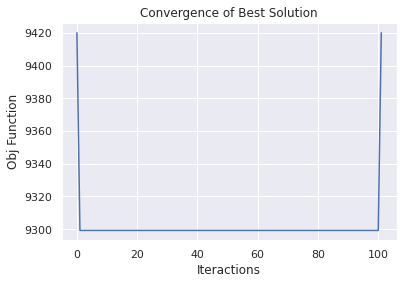

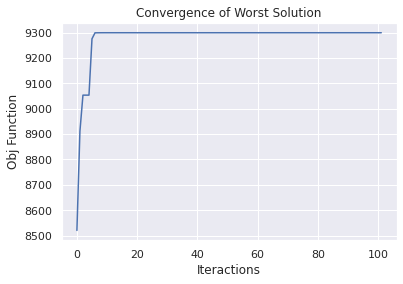

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


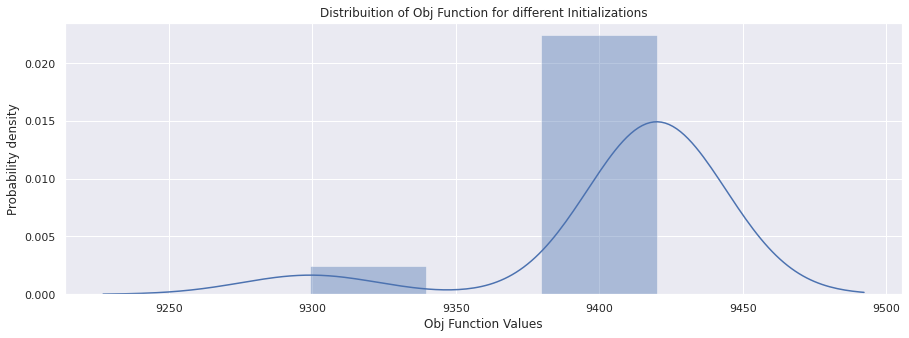

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


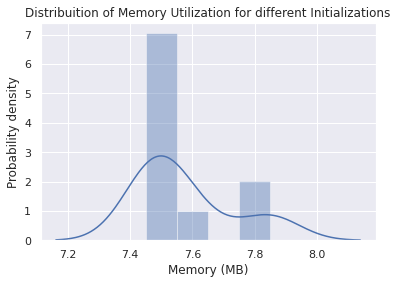

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


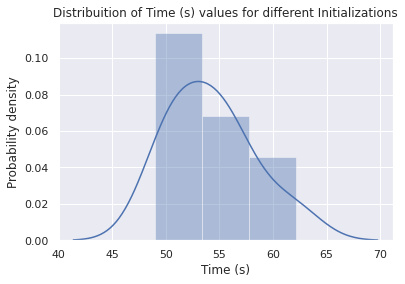

*********** LIST OF ABREVIATIONS ***********
MSTS = MaxSolutionsTS
MNTS = MaxNeighborhoodTS
********************************************


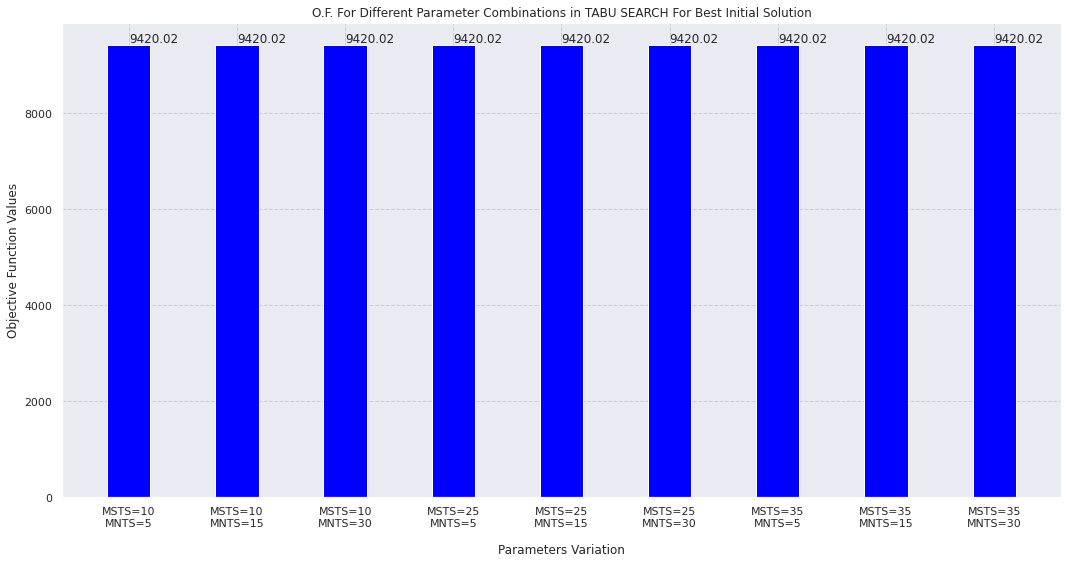

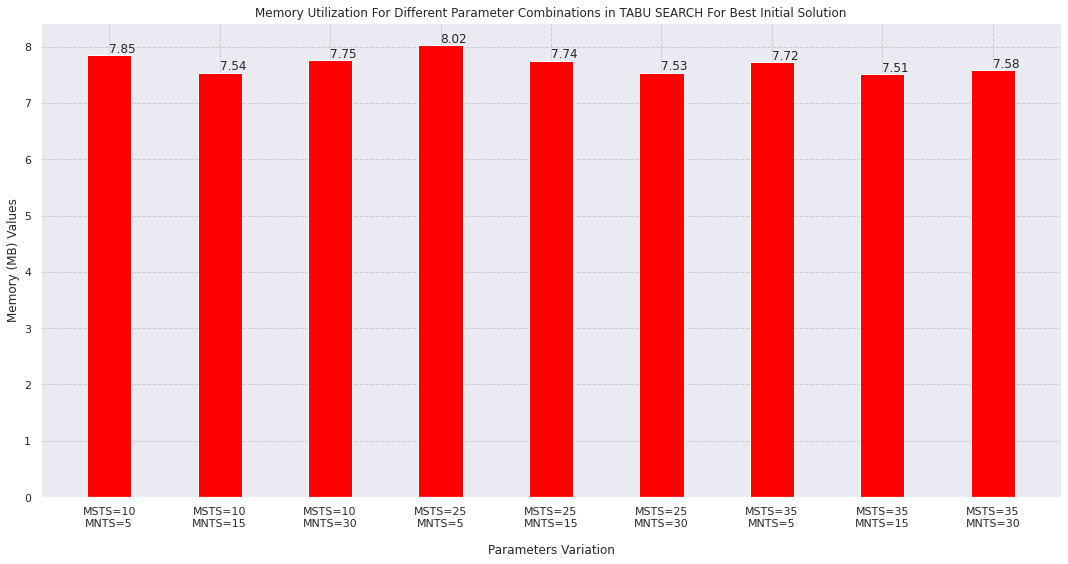

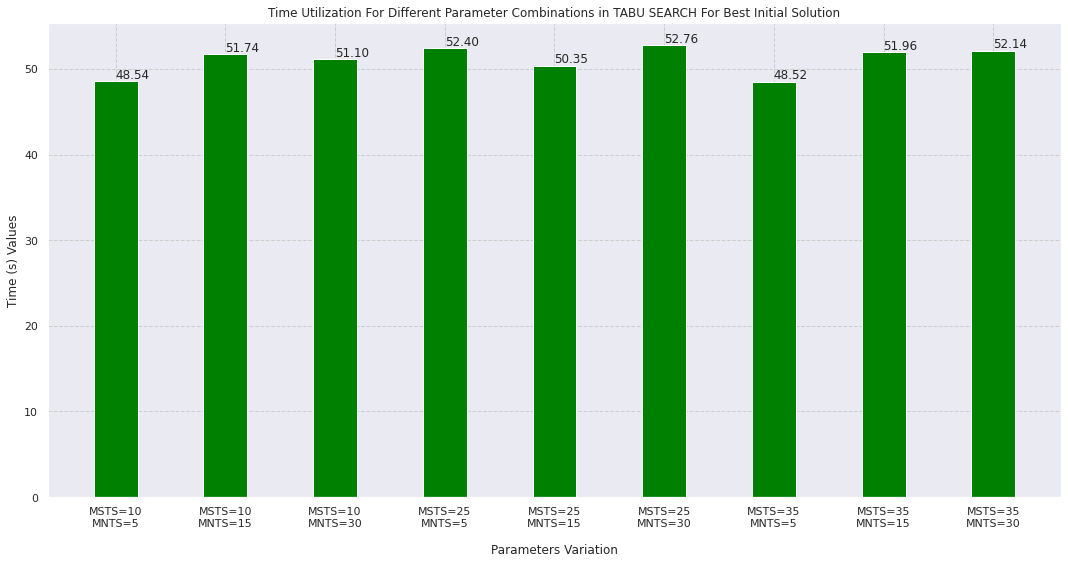

In [ ]:
''' ****************** PRINT STATISTICS ****************** '''

TABU.statistics(finalTS, convergenceTS, CPU_utilizationTS)

TABU.statisticsParameterVariation(BestParametersTS)

************ ADAPTIVE CUCKOO SEARCH STATISTICS ****************
-----TEST SETTINGS --------
MaxIterationsACS : 100
MaxRunTimeACS : 300
populationSizeACS : 20
p_a_ACS : 0.3
lambdaACS : 1.5
---------------------------
----- Overall Profile of Best Solutions --------
Obj Function Mean:  8096.455473272598
Obj Function Deviation:  225.14461250301414
Max Memory Used:  0.808896
Min Memory Used:  0.230433
Mean Memory Used:  0.5403116
Standard Deviation of Memory Used:  0.17449448929418945
Max Time Used:  152.0906138420105
Min Time Used:  142.67297506332397
Mean Time Used:  145.99816570281982
Standard Deviation of Time Used:  2.880855167446005
---------------------------
----- Profile of Best Solution --------
Max execution time used (s):  144.92311906814575
Memory used (MB):  0.808896
Value of Fitness Function:  8370.093086799732
Total boxes loadded:  73
Total price loadded [R$]:  64507.0
Total volume loadded [cm³]:  5934220.499999998
Total weight loadded [Kg]:  800.4000000000008
*************

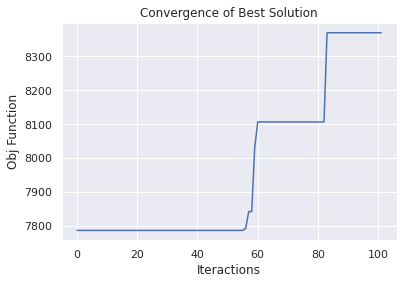

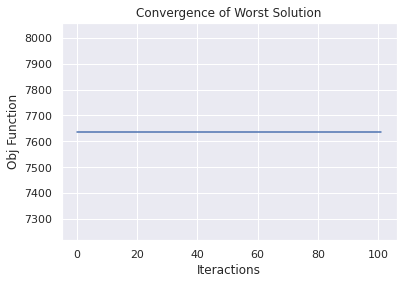

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


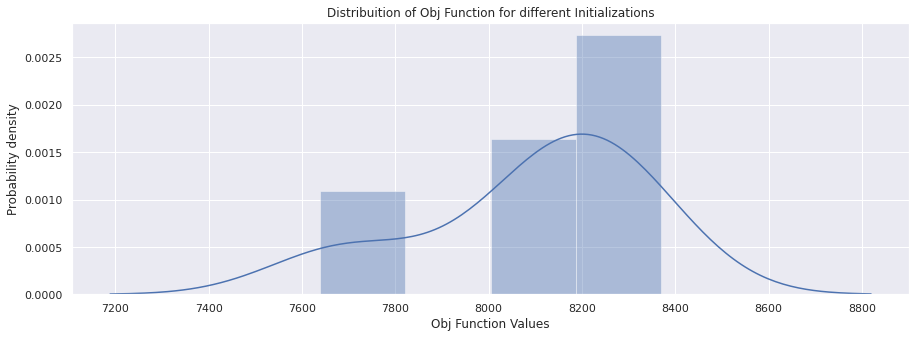

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


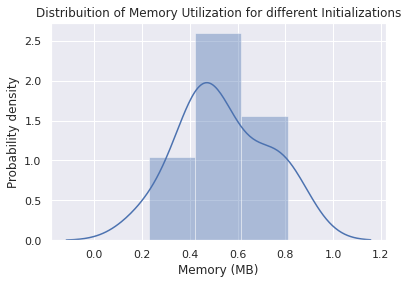

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


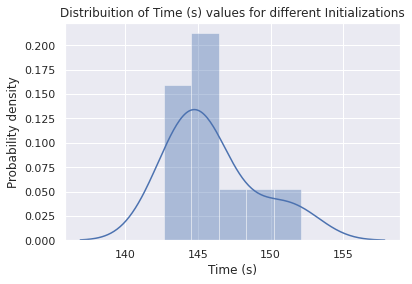

*********** LIST OF ABREVIATIONS ***********
pSACS = populationSizeACS
pACS = p_a_ACS
lACS = lambdaACS
********************************************


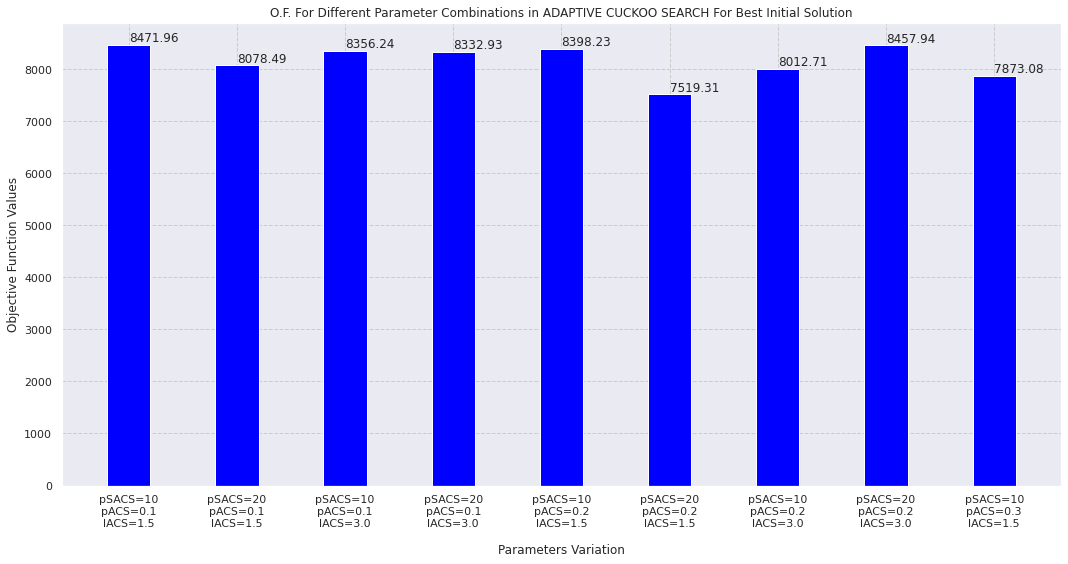

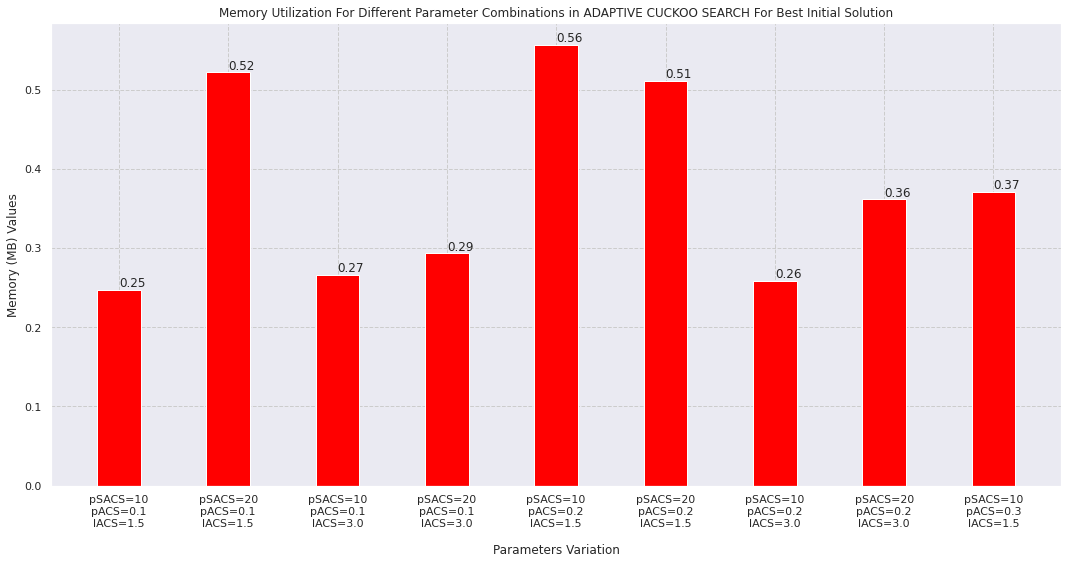

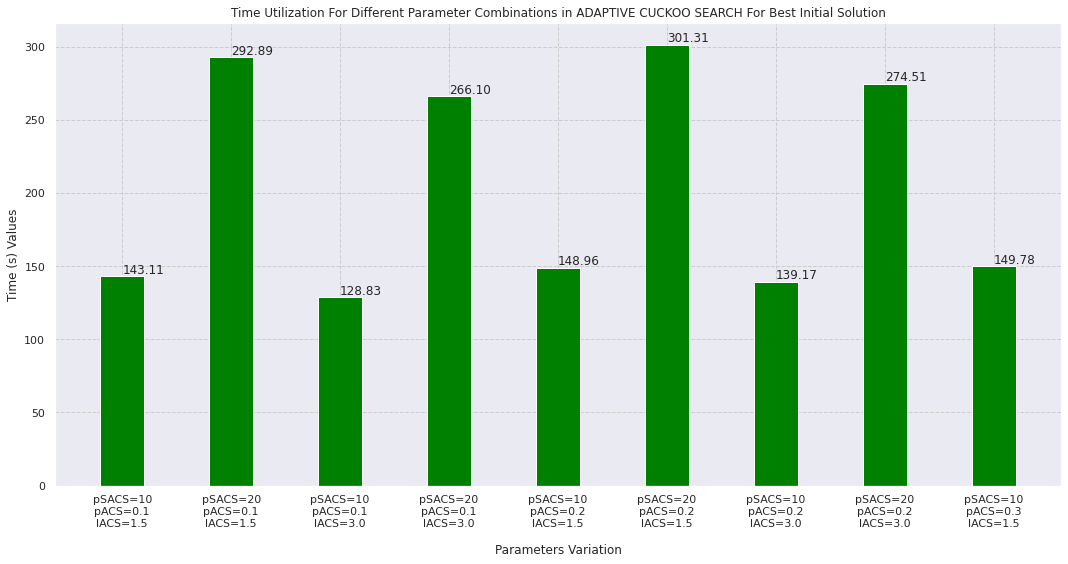


************************************************
TOTAL SIMULATION ELAPSED  TIME =  1:32:19.396071
************************************************



In [ ]:
ACS.statistics(finalACS, convergenceACS, CPU_utilizationACS)

ACS.statisticsParameterVariation(BestParametersACS)




#current, peak = tracemalloc.get_traced_memory();
seconds = time.time() - startTime
tempo = str(datetime.timedelta(seconds=seconds))
print("\n************************************************")
print("TOTAL SIMULATION ELAPSED  TIME = ", tempo)
#print(f"TOTAL MEMORY USAGE WAS: {current / 10**6}MB; Peak was {peak / 10**6}MB")
print("************************************************\n")
#tracemalloc.stop() #stop memory usage tracking
